# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: M. Hafis Afrizal
- Email: hafisafrizal10@gmail.com
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [ ]:
# Memuat dataset
df = pd.read_csv('employee_data.csv')

# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
display(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Dataset:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   i

## Exploratory Data Analysis (EDA)
Langkah ini dilakukan untuk mengeksplorasi data guna mendapatkan insight seperti distribusi, tren, dan korelasi.

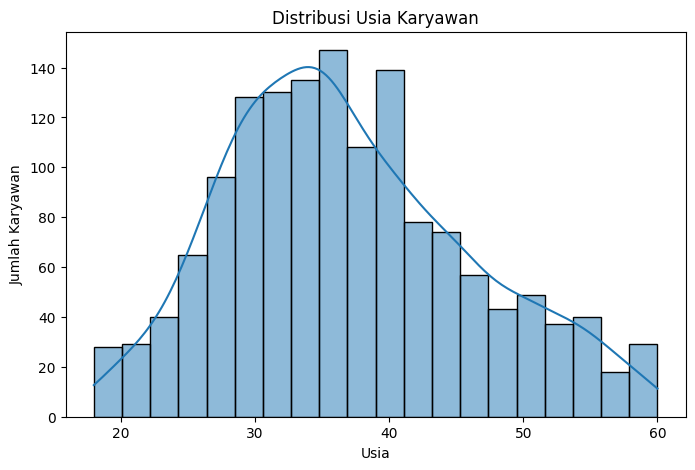

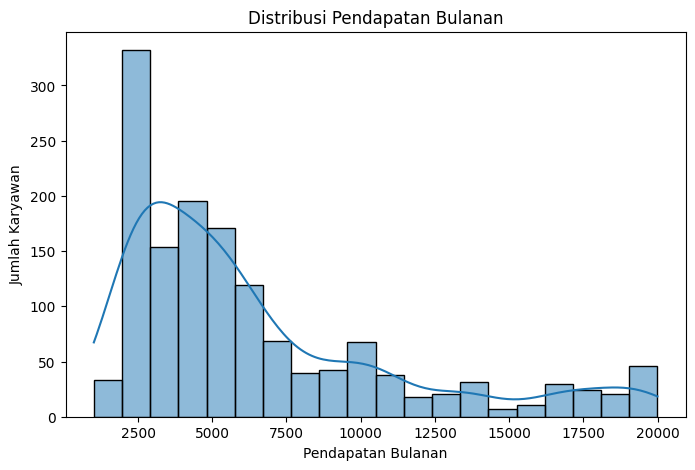

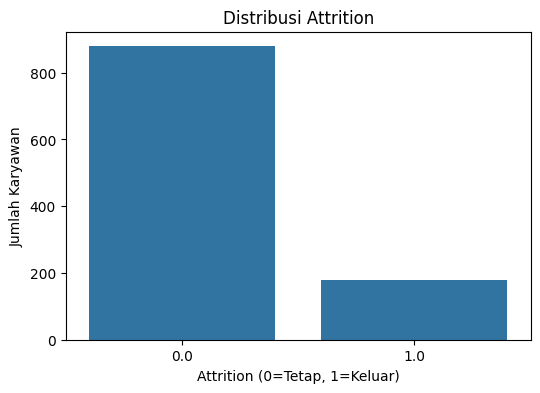

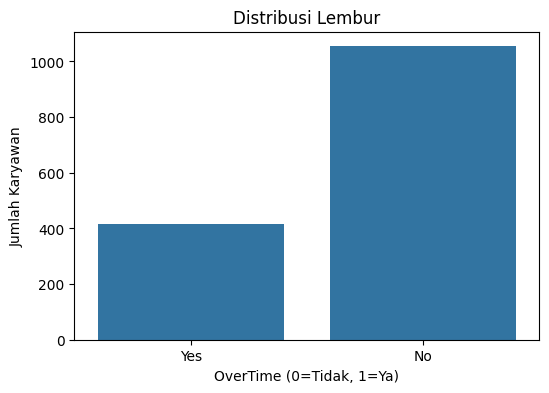

Statistik Deskriptif untuk Data Numerik:


,Age,MonthlyIncome,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,11.279592
std,9.135373,4707.956783,7.780782
min,18.000000,1009.000000,0.000000
25%,30.000000,2911.000000,6.000000
50%,36.000000,4919.000000,10.000000
75%,43.000000,8379.000000,15.000000
max,60.000000,19999.000000,40.000000


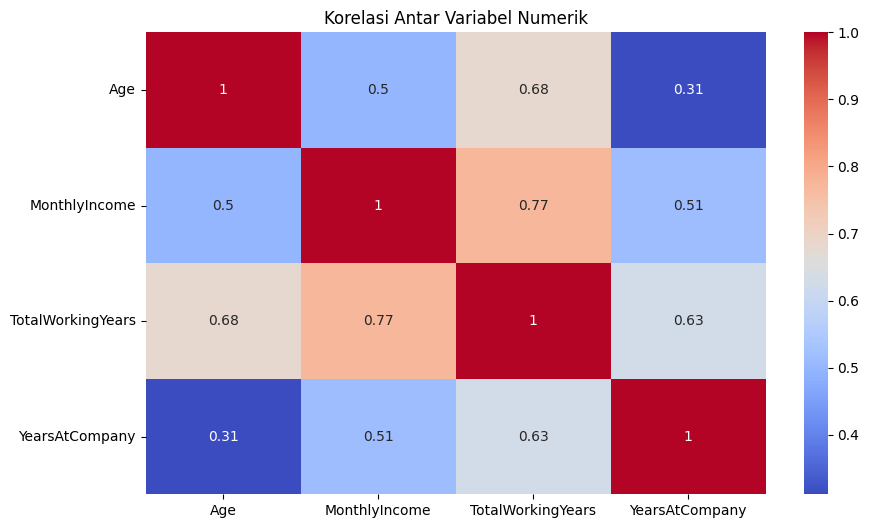

In [ ]:
# EDA Univariate: Distribusi data numerik
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribusi Usia Karyawan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyIncome', bins=20, kde=True)
plt.title('Distribusi Pendapatan Bulanan')
plt.xlabel('Pendapatan Bulanan')
plt.ylabel('Jumlah Karyawan')
plt.show()

# EDA Kategorikal: Distribusi variabel kategorikal
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0=Tetap, 1=Keluar)')
plt.ylabel('Jumlah Karyawan')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OverTime')
plt.title('Distribusi Lembur')
plt.xlabel('OverTime (0=Tidak, 1=Ya)')
plt.ylabel('Jumlah Karyawan')
plt.show()

# EDA Numerikal: Statistik deskriptif
print("Statistik Deskriptif untuk Data Numerik:")
display(df[['Age', 'MonthlyIncome', 'TotalWorkingYears']].describe())

# EDA Multivariate: Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

## Data Understanding

Statistik Deskriptif:


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Missing Values:


,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0



Distribusi Attrition:


,proportion
Attrition,
0.0,0.830813
1.0,0.169187


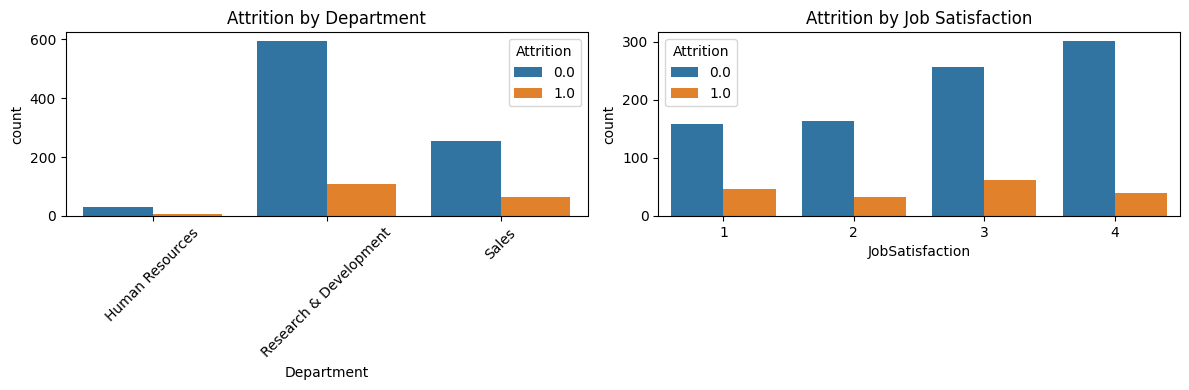

In [ ]:
# Statistik deskriptif
print("Statistik Deskriptif:")
display(df.describe())

# Cek missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Distribusi Attrition
print("\nDistribusi Attrition:")
display(df['Attrition'].value_counts(normalize=True))

# Visualisasi beberapa faktor potensial
plt.figure(figsize=(12, 4))

# Attrition berdasarkan Department
plt.subplot(1, 2, 1)
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)

# Attrition berdasarkan Job Satisfaction
plt.subplot(1, 2, 2)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [ ]:
# Mengatasi missing values pada Attrition
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].mode()[0])

# Encoding kolom kategorikal
le = LabelEncoder()
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Memilih fitur yang relevan
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
            'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
            'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
            'OverTime', 'PercentSalaryHike', 'PerformanceRating',
            'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
X = df[features]
y = df['Attrition'].astype(int)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data setelah preprocessing:")
display(X_train.head())

Data setelah preprocessing:


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,29,2,1247,2,20,2,2,4,1,45,...,3,4,1,10,2,3,3,2,0,2
727,29,2,1210,2,2,3,3,1,1,78,...,3,2,2,10,2,3,0,0,0,0
254,32,0,1109,1,29,4,3,4,0,69,...,3,2,0,10,2,3,8,7,7,7
1175,38,2,1084,1,29,3,5,4,1,54,...,3,1,1,9,3,1,7,7,1,7
1341,38,1,693,1,7,3,1,4,1,57,...,3,4,3,4,2,3,4,2,0,3


## Modeling

In [ ]:
# Inisialisasi dan pelatihan model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)



## Evaluation

Evaluasi Model:
Akurasi: 0.88
Precision: 0.25
Recall: 0.03
F1-Score: 0.06


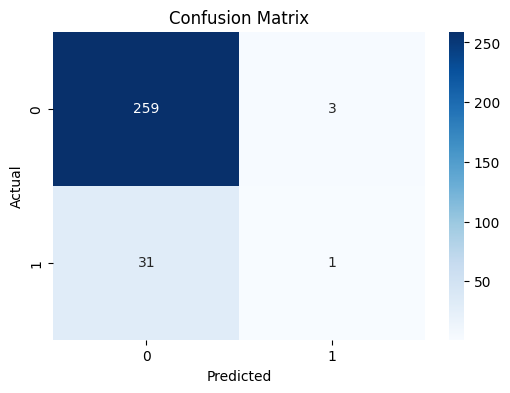

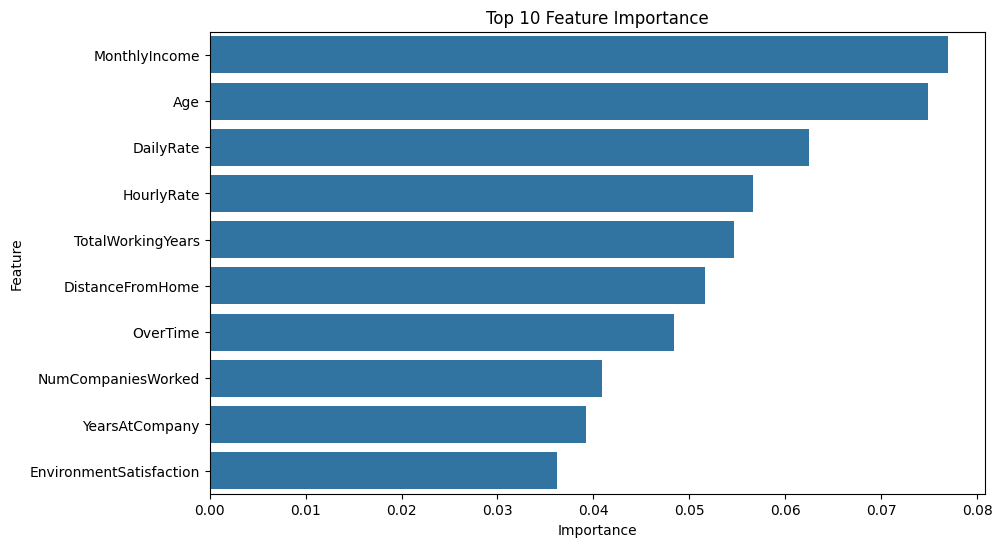

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluasi Model:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriks konfusi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

##Membuat visualisasi dashboard

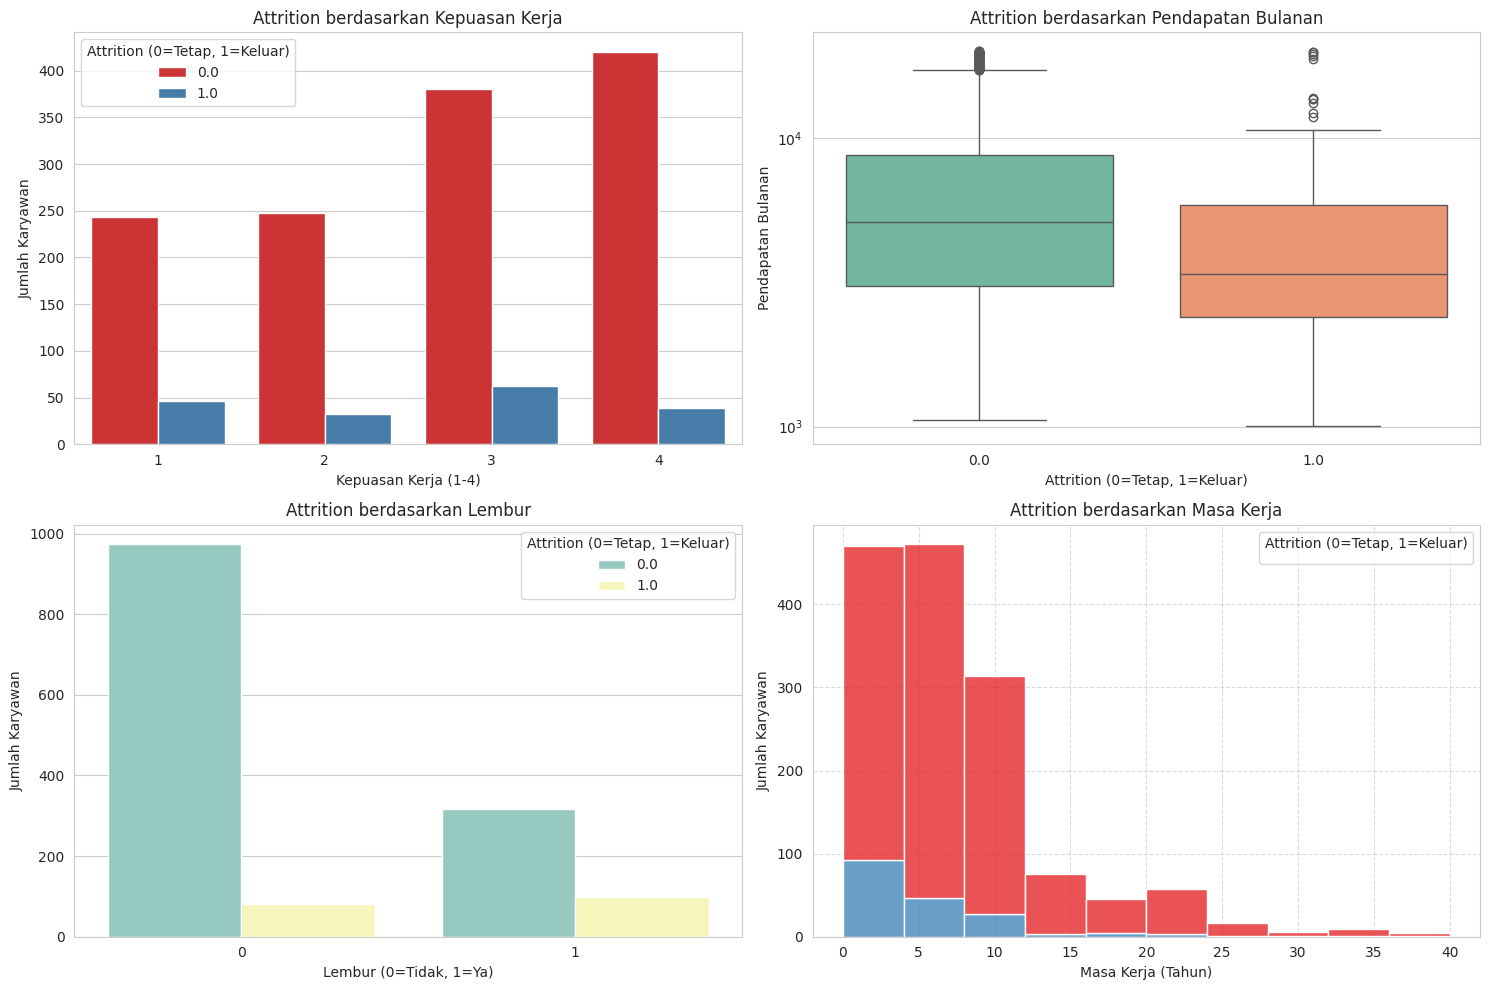

In [ ]:
# Membuat Business Dashboard dengan perbaikan
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Visualisasi 1: Attrition by Job Satisfaction
plt.subplot(2, 2, 1)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition berdasarkan Kepuasan Kerja', fontsize=12)
plt.xlabel('Kepuasan Kerja (1-4)', fontsize=10)
plt.ylabel('Jumlah Karyawan', fontsize=10)
plt.legend(title='Attrition (0=Tetap, 1=Keluar)')

# Visualisasi 2: Attrition by Monthly Income
plt.subplot(2, 2, 2)
df = df[df['MonthlyIncome'] < 20000]
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set2')
plt.title('Attrition berdasarkan Pendapatan Bulanan', fontsize=12)
plt.xlabel('Attrition (0=Tetap, 1=Keluar)', fontsize=10)
plt.ylabel('Pendapatan Bulanan', fontsize=10)
plt.yscale('log')  #

# Visualisasi 3: Attrition by OverTime
plt.subplot(2, 2, 3)
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition berdasarkan Lembur', fontsize=12)
plt.xlabel('Lembur (0=Tidak, 1=Ya)', fontsize=10)
plt.ylabel('Jumlah Karyawan', fontsize=10)
plt.legend(title='Attrition (0=Tetap, 1=Keluar)')

# Visualisasi 4: Attrition by Years at Company
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', palette='Set1', bins=10)
plt.title('Attrition berdasarkan Masa Kerja', fontsize=12)
plt.xlabel('Masa Kerja (Tahun)', fontsize=10)
plt.ylabel('Jumlah Karyawan', fontsize=10)
plt.legend(title='Attrition (0=Tetap, 1=Keluar)')
plt.grid(True, linestyle='--', alpha=0.7)

# Menyesuaikan layout dan menyimpan
plt.tight_layout()
plt.savefig('<username_dicoding>-dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Membuat folder 'model' jika belum ada
import os
os.makedirs('model', exist_ok=True)

# Menyimpan model ke file
import pickle
with open('model/rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai rf_model.pkl di folder model/")

Model berhasil disimpan sebagai rf_model.pkl di folder model/
